# 1. Frame the problem

The Blue Book for Bulldozers Kaggle competition requires us to predict the sale price of bulldozers sold at auctions. The dataset is split into three parts: training, validation, and test. The training set covers data up to the end of 2011, while the validation set includes data from January to April 2012. The test set covers data from May to November 2012. Our aim is to accurately predict the sale price using key fields such as SalesID, MachineID, saleprice, and saledate. We will use a regression model for the prediction, optimizing it using the provided training and validation sets.


# 2. Get the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
path = '/kaggle/input/bluebook-for-bulldozers/'

In [3]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG
from fastai.tabular.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

# 3. Explore the data

In [4]:
import matplotlib.pyplot as plt
import sklearn

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(path + 'TrainAndValid.csv', low_memory=False)

In [7]:
df

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,...,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,...,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,...,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,...,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [10]:
df.isna().sum()

SalesID                   0
SalePrice                 0
MachineID                 0
ModelID                   0
datasource                0
                      ...  
Backhoe_Mounting     331986
Blade_Type           330823
Travel_Controls      330821
Differential_Type    341134
Steering_Controls    341176
Length: 53, dtype: int64

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN


In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting,NaN,NaN,NaN,NaN,NaN
Blade_Type,NaN,NaN,NaN,NaN,NaN
Travel_Controls,NaN,NaN,NaN,NaN,NaN
Differential_Type,Standard,Standard,NaN,NaN,NaN


In [13]:
df.describe(include='all')

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,...,81875,81877,71564,71522
unique,NaN,NaN,NaN,NaN,...,10,7,4,5
top,NaN,NaN,NaN,NaN,...,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,...,39633,71447,70169,70774
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,...,NaN,NaN,NaN,NaN
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,...,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,...,NaN,NaN,NaN,NaN
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,...,NaN,NaN,NaN,NaN
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,...,NaN,NaN,NaN,NaN
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,...,NaN,NaN,NaN,NaN


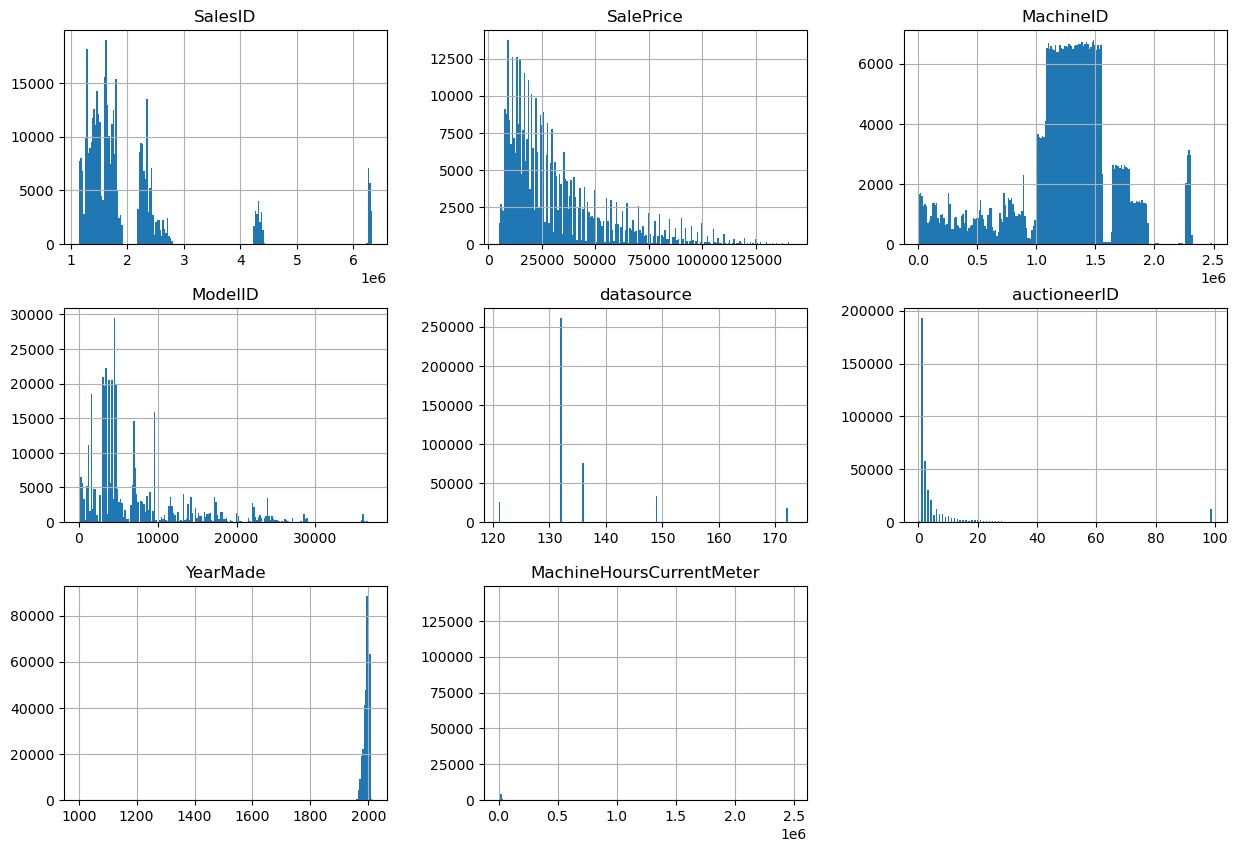

In [14]:
df.hist(bins=200, figsize=(15,10))
plt.show()

<AxesSubplot:ylabel='Frequency'>

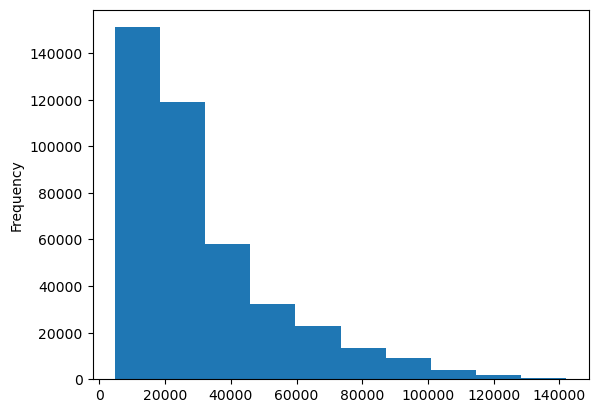

In [15]:
df.SalePrice.plot.hist()

<AxesSubplot:>

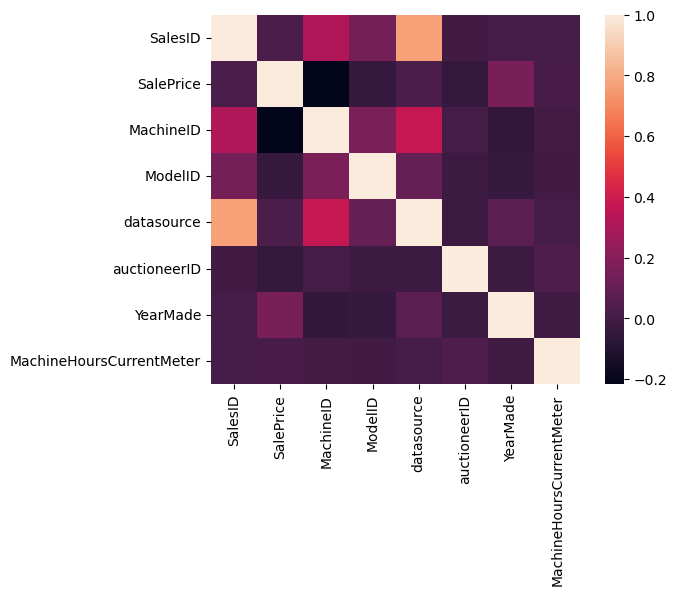

In [16]:
sns.heatmap(df.corr(), square=True)

# 4. Prepare the data

## Ordinal Columns

In [17]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [18]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [19]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [20]:
dep_var = 'SalePrice'

In [21]:
df[dep_var] = np.log(df[dep_var])

## Dates

In [22]:
df = add_datepart(df, 'saledate')

In [23]:
df_test = pd.read_csv(path + 'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [24]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

## Missing Values

In [25]:
procs = [Categorify, FillMissing]

In [26]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [27]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [28]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [29]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [30]:
len(to.train),len(to.valid)

(404710, 7988)

In [31]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

## Categorical

## Out of domain

# 5. Shortlis promising models

We will first start out with a simple Decision tree, then random forest, then finaly a deep learning approach.

In [32]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

## Decision Tree

In [33]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [34]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

In [35]:
m_rmse(m, xs, y)

0.55325

In [36]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [37]:
m_rmse(m, xs, y)

0.0

In [38]:
m_rmse(m, valid_xs, valid_y)

0.333576

overfitting...

In [39]:
m.get_n_leaves(), len(xs)

(324613, 404710)

Way to many leaf nodes...

In [40]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.211677, 0.267983)

In [41]:
m.get_n_leaves()

12397

Better...

## Random Forest

In [42]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [43]:
m = rf(xs, y);

In [44]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.171004, 0.233304)

Better...

In [45]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature n

In [46]:
r_mse(preds.mean(0), valid_y)

0.233304

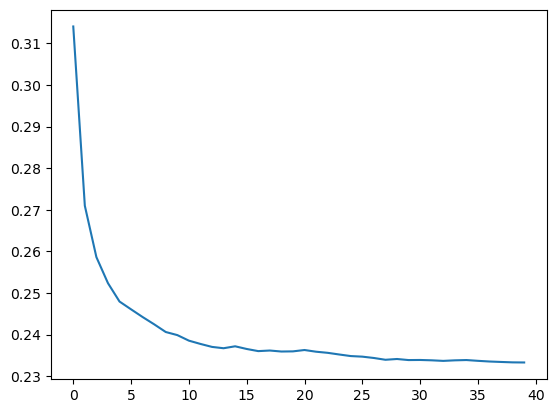

In [47]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [48]:
r_mse(m.oob_prediction_, y)

0.210831

In [49]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature n

In [50]:
preds.shape

(40, 7988)

In [51]:
preds_std = preds.std(0)

In [52]:
preds_std[:5]

array([0.30134876, 0.0944957 , 0.10028563, 0.29508596, 0.13940698])

In [53]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [54]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.177632
6,ProductSize,0.121808
30,Coupler_System,0.092402
7,fiProductClassDesc,0.072112
32,Hydraulics_Flow,0.054993
54,ModelID,0.054246
65,saleElapsed,0.050020
3,fiSecondaryDesc,0.048826
12,Enclosure,0.035210
1,fiModelDesc,0.034252


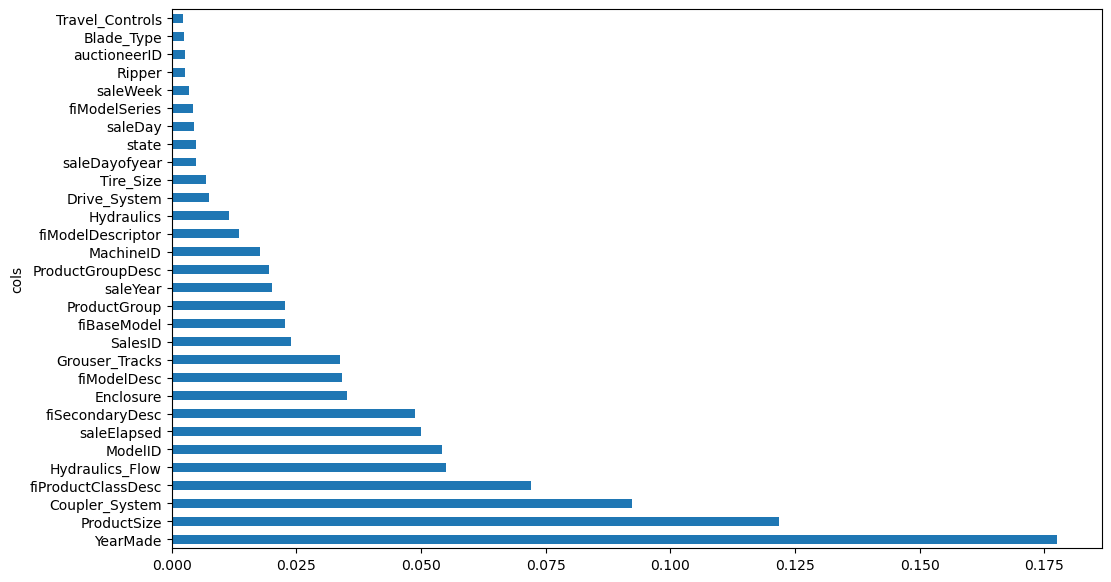

In [55]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [56]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [57]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [58]:
m = rf(xs_imp, y)

In [59]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181173, 0.232672)

In [60]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

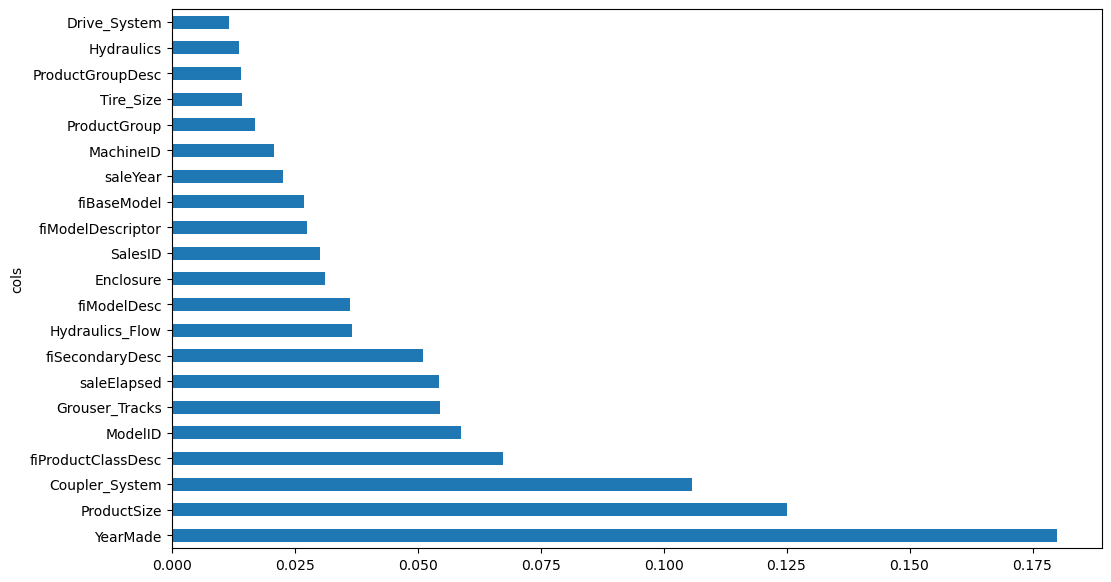

In [61]:
plot_fi(rf_feat_importance(m, xs_imp));

In [62]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [63]:
get_oob(xs_imp)

0.8762639419303553

In [64]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.8762469025859769,
 'saleElapsed': 0.8715840907027517,
 'ProductGroupDesc': 0.8762621774968335,
 'ProductGroup': 0.8775009620594152,
 'fiModelDesc': 0.8759161219805283,
 'fiBaseModel': 0.8765447868484876,
 'Hydraulics_Flow': 0.878390497290091,
 'Grouser_Tracks': 0.8782979071533905,
 'Coupler_System': 0.8779843797842206}

In [65]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8750474954084875

In [66]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [67]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183317, 0.232484)

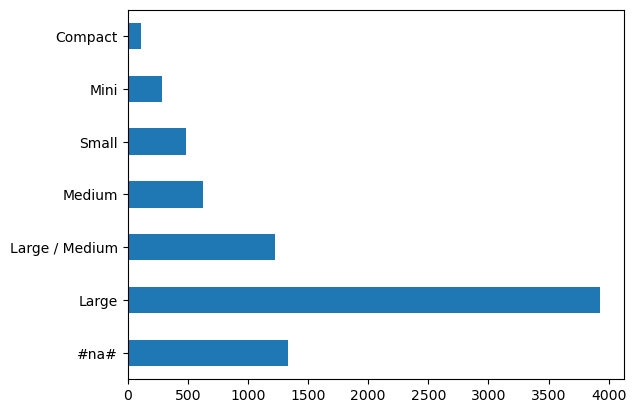

In [68]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

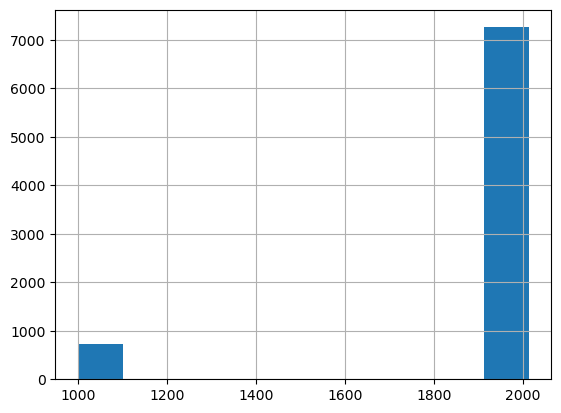

In [69]:
ax = valid_xs_final['YearMade'].hist()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


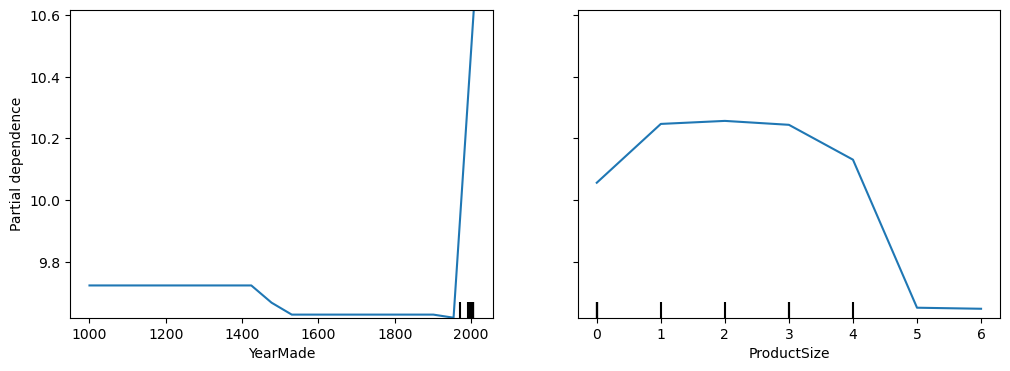

In [70]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

In [71]:
!pip install treeinterpreter
!pip install waterfallcharts

In [72]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [73]:
row = valid_xs_final.iloc[:5]

In [74]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [75]:
prediction[0], bias[0], contributions[0].sum()

(array([9.9057259]), 10.104537761057735, -0.198811857687913)

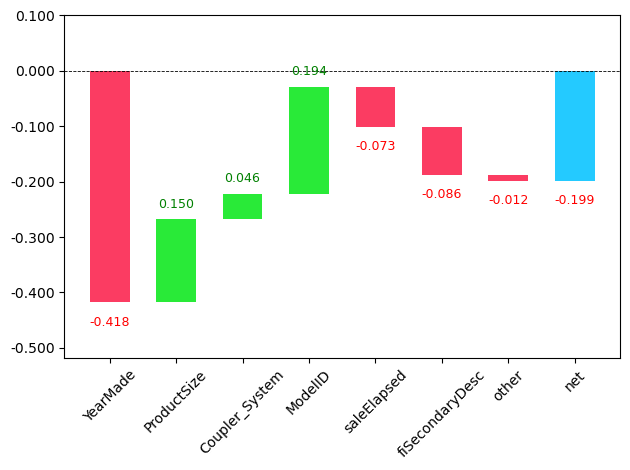

In [76]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

## Deep Learning

In [77]:
np.random.seed(42)

In [78]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
6,saleElapsed,0.879565
10,SalesID,0.088059
12,MachineID,0.027100
5,ModelID,0.000941
0,YearMade,0.000940
14,Hydraulics,0.000628


In [79]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.233043
SalesID 0.230563
saleElapsed 0.234069
MachineID 0.231429


In [80]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229454

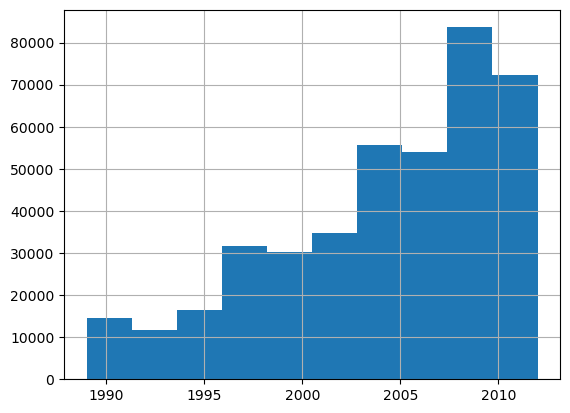

In [81]:
xs['saleYear'].hist();

In [82]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [83]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177652, 0.22995)

In [84]:
df_nn = pd.read_csv(path + 'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [85]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [86]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [87]:
cont_nn

['saleElapsed']

In [88]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
Hydraulics_Flow          3
ModelID               5281
fiSecondaryDesc        177
Enclosure                6
fiModelDesc           5059
ProductGroup             6
fiModelDescriptor      140
Hydraulics              12
Drive_System             4
Tire_Size               17
dtype: int64

In [89]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176556, 0.229402)

In [90]:
cat_nn.remove('fiModelDescriptor')

In [91]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dep_var)

In [92]:
dls = to_nn.dataloaders(1024)

In [93]:
y = to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

In [94]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00013182566908653826)

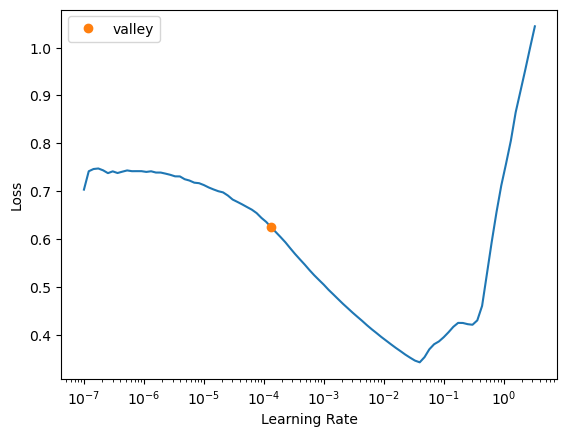

In [95]:
learn.lr_find()

In [96]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.063463,0.070333,00:26
1,0.053105,0.060864,00:25
2,0.047440,0.052852,00:26
3,0.043409,0.051271,00:28
4,0.040135,0.050292,00:28


In [97]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.22426

# 6. Fine Tune, Ensamble

In [98]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [99]:
r_mse(ens_preds,valid_y)

0.222138